In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble
import seaborn as sns
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import RandomizedSearchCV
import random
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [2]:
#Reading working data
dataset = pd.read_excel("Final_Data.xls")
data = dataset.iloc[:,1:len(dataset)]

In [3]:
#Printing data columns
data.head()

cement   blast  flyash   water  plast  coarse    fine  age  strength
0  331.000000  170.00    0.00  195.00   8.00   811.0  778.45   28         3
1  393.000000    0.00    0.00  192.00   0.00   940.0  758.00    3         1
2  212.000000    0.00  124.78  185.70   7.84  1085.4  799.54   14         2
3  280.729655  144.20  112.30  220.10  10.10   923.2  657.90   28         1
4  165.000000    0.02  143.57  163.81   0.00  1005.6  900.90    3         1

In [4]:
data.describe()

cement        blast       flyash        water        plast  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean    280.729655    74.242893    54.877835   182.113932     6.279995   
std      99.060606    86.282690    64.204505    19.976024     6.129653   
min     102.000000     0.000000     0.000000   121.750000     0.000000   
25%     202.000000     0.000000     0.000000   168.000000     0.000000   
50%     280.729655    23.000000     0.000000   185.700000     6.470000   
75%     339.000000   142.725000   118.270000   192.000000    10.160000   
max     540.000000   359.400000   200.100000   247.000000    32.200000   

            coarse         fine          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    973.130475   773.015175    46.803883     2.170874  
std      74.564618    76.576331    66.625131     0.825920  
min     801.000000   594.000000     1.000000     1.000000  
25%     932.000000   741.100000     7.000000     2.000000  
50%     973.130475   778.450000    28.000000     2.000000  
75%    1025.000000   812.000000    56.000000     3.000000  
max    1145.000000   992.600000   365.000000     4.000000

In [5]:
#Saving our predictor and response variables in different dataframe 
y = data.strength
x = data.drop('strength',axis=1)

In [6]:
#Calculating VIF for detecting collinearity 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"] = x.columns
print(vif)

   VIF Factor Features
0   14.478621   cement
1    2.823529    blast
2    3.451721   flyash
3   84.423071    water
4    4.385283    plast
5   90.438337   coarse
6   76.642105     fine
7    1.662904      age


In [7]:
#Dropping variables coarse and fine with high VIF
x_new = x.drop(['coarse','fine','water'], axis = 1)

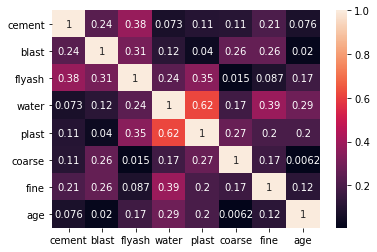

In [8]:
#Correlation plot to show the inter correlation among the feature variables

sns.heatmap(x.corr().abs(),annot=True )
plt.show()

In [9]:
#Training a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
accuracy = cross_val_score(knn, x_new, y, scoring='accuracy', cv=KFold(10, shuffle=True, random_state = 1)) 
rmse = np.sqrt(-np.mean(cross_val_score(knn, x_new, y, scoring='neg_mean_squared_error', cv=KFold(10, shuffle=True,random_state = 1))))
mae = np.mean(cross_val_score(knn, x_new, y, scoring='neg_mean_absolute_error', cv=KFold(10, shuffle=True,random_state = 1)))
print("RMSE of KNN Classifier is: " , rmse)
print("Negetive MAE of KNN Classifier is :", mae)
print("Accuracy of KNN Classifier is: " , accuracy.max()* 100)

y_pred = cross_val_predict(knn, x_new, y, cv=KFold(10, shuffle=True, random_state = 1))
conf_mat = confusion_matrix(y, y_pred)
print('Confusion Matrix :\n')
print(conf_mat)

RMSE of KNN Classifier is:  0.7091633248830789
Negetive MAE of KNN Classifier is : -0.40388349514563104
Accuracy of KNN Classifier is:  75.72815533980582
Confusion Matrix :

[[140  60   6   1]
 [ 62 382  64   3]
 [ 14 110 109   8]
 [  1  22  16  32]]


In [10]:
#Training a Naive Bayes classifier 
gnb = GaussianNB()
accuracy = cross_val_score(gnb, x_new, y, scoring='accuracy', cv=KFold(10, shuffle=True, random_state = 1)) 
rmse = np.sqrt(-np.mean(cross_val_score(gnb, x_new, y, scoring='neg_mean_squared_error', cv=KFold(10, shuffle=True,random_state = 1))))
mae = np.mean(cross_val_score(gnb, x_new, y, scoring='neg_mean_absolute_error', cv=KFold(10, shuffle=True,random_state = 1)))
print("RMSE of Naive Bayes Classifier is: " , rmse)
print("Negetive MAE of Naive Bayes Classifier is :", mae)
print("Accuracy of Naive Bayes Classifier is: " , accuracy.max()* 100)

y_pred = cross_val_predict(gnb, x_new, y, cv=KFold(10, shuffle=True, random_state = 1))
conf_mat = confusion_matrix(y, y_pred)
print('Confusion Matrix :\n')
print(conf_mat)

RMSE of Naive Bayes Classifier is:  0.7980558902003638
Negetive MAE of Naive Bayes Classifier is : -0.5320388349514562
Accuracy of Naive Bayes Classifier is:  61.165048543689316
Confusion Matrix :

[[139  66   2   0]
 [137 315  43  16]
 [  9 159  44  29]
 [  1  24   9  37]]


In [11]:
#Training a DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 10,random_state = 1)
accuracy = cross_val_score(dtree_model, x_new, y, scoring='accuracy', cv=KFold(10, shuffle=True, random_state = 1)) 
rmse = np.sqrt(-np.mean(cross_val_score(dtree_model, x_new, y, scoring='neg_mean_squared_error', cv=KFold(10, shuffle=True,random_state = 1))))
mae = np.mean(cross_val_score(dtree_model, x_new, y, scoring='neg_mean_absolute_error', cv=KFold(10, shuffle=True,random_state = 1)))
print("RMSE of Decision TRee Classifier is: " , rmse)
print("Negetive MAE of Decision TRee Classifier is :", mae)
print("Accuracy of Decision TRee Classifier is: " , accuracy.max()* 100)

y_pred = cross_val_predict(dtree_model, x_new, y, cv=KFold(10, shuffle=True, random_state = 1))
conf_mat = confusion_matrix(y, y_pred)
print('Confusion Matrix :\n')
print(conf_mat)

RMSE of Decision TRee Classifier is:  0.5845918001610474
Negetive MAE of Decision TRee Classifier is : -0.287378640776699
Accuracy of Decision TRee Classifier is:  80.58252427184466
Confusion Matrix :

[[157  43   7   0]
 [ 33 420  53   5]
 [  8  79 141  13]
 [  0   8  19  44]]
